In [1]:
# First, I import all of the Python libraries. And then have a real look at some of these libraries. 
# Pandas is a data processing library. NumPy is for n-dimensional arrays, 
# and matplotlib and NumPy both have similar viewing capabilities.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn import metrics

In [4]:
# Next,  We can now import a CSV file to read the Phishing attack dataset and view its contents. 
# We can see how utilising a spreadsheet to store data and information can be beneficial.
# To check information, we can utilise the info() method.
# The describe() function can be used to explain a dataset.
# In this situation, a new Def function can be created to choose useful qualities.
# Deal with null values. There could be a lot of notice data in the dataset, 
# lowering the accuracy of our machine learning  model. 
# Machine learning can deal with null or missing values in a variety of ways. 
# They'll now be used to organise our disorganised info. The function to use is 'data.isna().sum()'.

In [5]:
attack = pd.read_csv('Dataset.csv', na_values={'lable': ["not available", "n.a."]})

In [6]:
attack

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [7]:
columns = ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length','HTTPS_token','Favicon','port','Request_URL','URL_of_Anchor','Links_in_tags','SFH','Submitting_to_email','Abnormal_URL','Redirect','on_mouseover','RightClick','popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
data1 = pd.DataFrame(attack, columns=columns)
data1['target'] = attack['Result']
display(data1.head())
display(data1.info())
display(data1.isna().sum())
display(data1.describe())

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,target
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   HTTPS_token                  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

None

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
HTTPS_token                    0
Favicon                        0
port                           0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
target    

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,target
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.675079,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.737779,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# The matplotlib.pyplot Python package can be used to display plot figures.
# As you can see from the figure above, there are two target values:
# -1 and 1. As a result, -1 denotes phishing websites and 1 denotes legitimate websites.

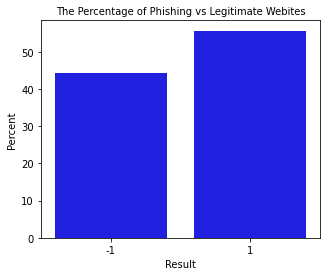

In [32]:
plt.figure(figsize=(5, 4))
Phishing_ax_plot = sns.barplot(x="Result", y="Result", data=attack, estimator=lambda x: len(x) / len(attack) * 100, color = 'Blue')
Phishing_ax_plot.set(ylabel="Percent");
Phishing_ax_plot.set_title('The Percentage of Phishing vs Legitimate Webites', size = 10);
plt.savefig('resultpercentageplot.png', dpi=300, bbox_inches='tight');

In [10]:
# Separating the information among train and tests sets with the sklearn package
# I manually split the data into training as well as testing sets instances and separated them during an 80–20 ratio using the sklearn module.
# StandardScaler techniques are now used to standardize the model parameters of the training and testing datasets.

In [14]:
Px = data1.drop(labels='target', axis=1).values
Py = data1['target'].values
PX_train, PX_test, Py_train, Py_test = train_test_split(Px, Py, test_size=0.20, random_state = 2055, stratify=Py)
Pss = StandardScaler()
PX_train_scaled = Pss.fit_transform(PX_train)
PX_test_scaled = Pss.transform(PX_test)
Py_train = np.array(Py_train)
print(PX_train_scaled.shape, PX_test_scaled.shape)

(8844, 30) (2211, 30)


In [12]:
# Next use the PCA method for indicate the components (features) you really like data analyze.
#Before determining where to make the cut, we'll set to observe the explained variance of all the created sections. 
# Then we can use the PCA function to "fit" with X_train_scaled data.
# This central feature contains a single % of the input, whereas the primary component 2 only includes % all the records.
# as shown in the following result. Another point to remember is that when 2-dimensional data gets projected to two-dimensional 
# information, the data is lost.
# Display the visualization of the 11055 data on the axis of principal component component 1 and principal component 2. 
# This should give a good indication of how your samples are split between the two groups.

In [16]:
Phishing_pca_test = PCA(n_components=3)
Phishing_attack_PCAP = Phishing_pca_test.fit_transform(PX_train_scaled)
PX_train_scaled_Phishing = Phishing_pca_test.transform(PX_train_scaled)
PX_test_scaled_Phishing = Phishing_pca_test.transform(PX_test_scaled)
Phishing_attack_Df_Pca = pd.DataFrame(data = Phishing_attack_PCAP, columns = ['pca1', 'pca2', 'pca3'])
Phishing_attack_Df_Pca

,pca1,pca2,pca3
0,-1.612519,-0.738742,-0.451797
1,-1.362354,0.068179,-0.674852
2,-1.532959,-0.437602,2.319395
3,-1.355904,-0.410947,-1.479954
4,-1.651934,-0.566063,2.029819
...,...,...,...
8839,5.284466,-2.677369,1.950743
8840,-1.303036,-0.157637,-0.697576
8841,-1.624461,-0.644589,1.164801
8842,-1.585799,-0.578313,1.509119


In [13]:
# in the dataset has 2 target value -1 and 1 so, we can assign -1 is Benign and 1 is Malignant

In [17]:
data1['target'].replace(-1, 'Benign',inplace=True)
data1['target'].replace(1, 'Malignant',inplace=True)

In [18]:
# As observed in the graphs figure, the two classes benign and malignant can sometimes be linearly separable to some degree.
# Some compositae result may be that the benign class is more widely distributed than the malignant class.
# as we can see PCA 2-d image.

<Figure size 432x288 with 0 Axes>

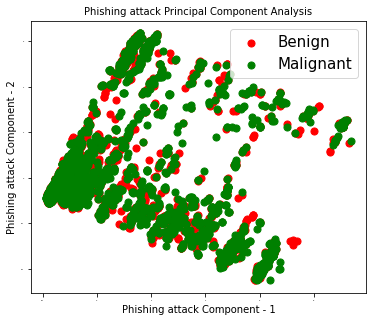

In [20]:
plt.figure()
plt.figure(figsize=(6,5))
plt.xticks(fontsize=2)
plt.yticks(fontsize=2)
plt.xlabel('Phishing attack Component - 1',fontsize=10)
plt.ylabel('Phishing attack Component - 2',fontsize=10)
plt.title("Phishing attack Principal Component Analysis",fontsize=10)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data1['target'] == target
    plt.scatter(Phishing_attack_Df_Pca.loc[indicesToKeep, 'pca1']
               , Phishing_attack_Df_Pca.loc[indicesToKeep, 'pca2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [17]:
# This is 3D scatterplots to showcase the results of a PCA. 
# The three red lines highlighting the dimensions should be noted.

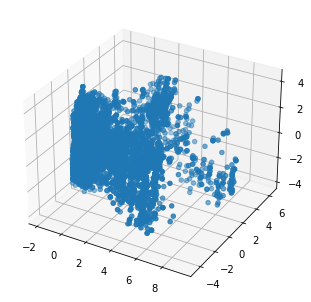

In [23]:
# # Matplotlib Version
Phishing_fig_attack = pylab.figure()
Phishing_ax = Axes3D(Phishing_fig_attack)
Phishing_ax.scatter(Phishing_attack_Df_Pca.pca1, Phishing_attack_Df_Pca.pca2, Phishing_attack_Df_Pca.pca3)
plt.show()

In [19]:
# In the base paper has best accuracy by using RandomForestclassifier.
# We'll employ a variety of regression and classification models to assess the accuracy score, 
# however RandomForestClassifier provides the best accuracy when compared to other models, therefore we'll choose it.
# A random forest is a classification method that uses a huge quantity of decision trees to classify data. 
# Bagging and feature randomization are used to create every unique trees.
# to create an uncorrelated forest of trees with a collective estimate which is more correct all each individual node
# The code and accuracy are as follows.
# RandomForestClassifier has an accuracy score of 94 percent and a low error rate when compared to other models. 
# With an accuracy of 88 percent, this algorithm can predict the quality of white wine.
# Compare the anticipated and original values to see if our model accurately predicted the true values
# Confusion matrix: The confusion matrix, which is presented throughout a structure style, displays between true vs False.
# The TN, FP, FN, and TP values are all calculated or summarised.

                      Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Classifier  0.936228   0.933917  0.952884  0.943305


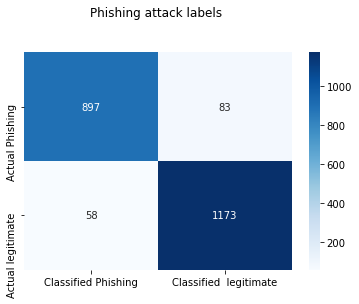

In [37]:
Phishing_RFC_Attack = RandomForestClassifier()
Phishing_RFC_Attack.fit(PX_train_scaled_Phishing, Py_train)
Py_pred_phishing = Phishing_RFC_Attack.predict(PX_test_scaled_Phishing)
Phishing_accuracy_attack = accuracy_score(Py_test, Py_pred_phishing)
Precision_Phishing = precision_score(Py_test, Py_pred_phishing)
Recall_Phishing = recall_score(Py_test, Py_pred_phishing)
F1_Phishing = f1_score(Py_test, Py_pred_phishing)
results = pd.DataFrame([['Random Forest Classifier', Phishing_accuracy_attack, Precision_Phishing, Recall_Phishing, F1_Phishing]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)
# Ploting the Confusion_matrix for phishing attack labels 
Phishing_confusion_mtx = confusion_matrix(Py_test, Py_pred_phishing)
Phishing_attack = sns.heatmap(Phishing_confusion_mtx, annot=True, cmap='Blues',fmt='d')
Phishing_attack.set_title('Phishing attack labels \n\n');

Phishing_attack.yaxis.set_ticklabels(['Actual Phishing','Actual legitimate'])
Phishing_attack.xaxis.set_ticklabels(['Classified Phishing','Classified  legitimate'])
plt.show()